In [1]:
#Import Libraries
from bs4 import BeautifulSoup
import re
import pandas as pd
from spellchecker import SpellChecker
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib
from textblob import TextBlob

import numpy as np
# Install new libraries
#%pip install pyspellchecker
#%pip install TextBlob

import warnings
warnings.filterwarnings('ignore')

In [2]:
preprocessed_vodafone_reviews = pd.read_csv('pre_processed_vodafone_data.csv')  

In [3]:
# Fix representation of lists in the imported csv :(

# Abstract syntax tree is used to recreate the lists of tuples stored in the pre-processed data
import ast

for i in range(len(preprocessed_vodafone_reviews)):
    preprocessed_vodafone_reviews.sentences.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.sentences.iloc[i]))
    preprocessed_vodafone_reviews.noun_phrases.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.noun_phrases.iloc[i]))
    preprocessed_vodafone_reviews.lemmatised_sentences.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.lemmatised_sentences.iloc[i]))
    preprocessed_vodafone_reviews.bi_grams.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.bi_grams.iloc[i]))
    preprocessed_vodafone_reviews.tri_grams.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.tri_grams.iloc[i]))
    preprocessed_vodafone_reviews.words.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.words.iloc[i]))
    preprocessed_vodafone_reviews.nouns.iloc[i] = list(ast.literal_eval(preprocessed_vodafone_reviews.nouns.iloc[i]))
    
preprocessed_vodafone_reviews.head(5)

,review_id,title,review,score,review_sentiment,sentences,lemmatised_title,noun_phrases,lemmatised_sentences,bi_grams,tri_grams,words,nouns
0,1,vodaphone almost ruined my life - stolen ident...,my email and password were part of a company d...,1,-0.9390,[(vodaphone almost ruined my life - stolen ide...,vodaphone almost ruin life steal identity secu...,"[(company database leak, -0.34, 1), (vodafone ...",[(vodaphone almost ruin life steal identity se...,"[(ruin life, -0.5584, 1), (life steal, -0.5584...","[(vodaphone almost ruin, -0.5584, 1), (ruin li...","[(vodaphone, -0.5584, 1), (almost, -0.5584, 1)...","[(vodaphone, -0.5584, 1), (life, -0.5584, 1), ..."
1,2,misguided sale,"misguided salecouple of days ago, i was told t...",1,0.8555,"[(misguided sale, 0.0, 1), (misguided salecoup...",misguide sale,"[(trade in value, 0.34, 1), (old phone, 0.34, ...","[(misguide, 0.0, 1), (misguided salecouple day...","[(misguide sale, 0.0, 1), (misguided salecoupl...","[(misguided salecouple day, 0.34, 1), (trade i...","[(misguide, 0.0, 1), (misguided, 0.34, 1), (sa...","[(misguide, 0.0, 1), (salecouple, 0.34, 1), (d..."
2,3,worst network,worst network for data in australia. i used vo...,1,-0.6858,"[(worst network, -0.6249, 1), (worst network f...",bad network,"[(mobile phone, -0.7227, 1), (i need data, -0....","[(bad network, -0.6249, 1), (bad network data ...","[(bad network, -0.6249, 1), (bad network, -0.6...","[(network for data, -0.6249, 1), (i use vodafo...","[(bad, -0.6249, 1), (network, -0.6249, 1), (ba...","[(network, -0.6249, 1), (network, -0.6249, 1),..."
3,4,insurance contract with them is bulshit,they charged me for over a year a plan with in...,1,0.3612,"[(insurance contract with them is bulshit, 0.0...",insurance contract with them bulshit,"[(insurance contract, 0.0, 1), (free phone, 0....","[(insurance contract bulshit, 0.0, 1), (charge...","[(insurance contract, 0.0, 1), (year plan, 0.3...","[(plan with insurance, 0.3612, 1), (month free...","[(insurance, 0.0, 1), (contract, 0.0, 1), (bul...","[(insurance, 0.0, 1), (contract, 0.0, 1), (cha..."
4,5,record all your phonecalls with them when you ...,my parents and i have been with vodafone for a...,1,0.4926,[(record all your phonecalls with them when yo...,record all your phonecalls with them when you ...,"[(decent coverage, 0.0, 1), (cheap price, 0.0,...","[(record phonecalls issue, 0.0, 1), (parent vo...","[(decent coverage, 0.0, 1), (cheap price, 0.0,...","[(thats strictly due, 0.0, 1), (company with d...","[(record, 0.0, 1), (phonecalls, 0.0, 1), (issu...","[(record, 0.0, 1), (issue, 0.0, 1), (parent, 0..."


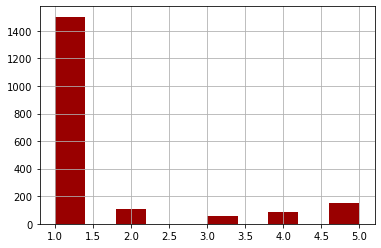

In [4]:
##########################################
##  Some EDA

preprocessed_vodafone_reviews['score'] = pd.to_numeric(preprocessed_vodafone_reviews['score'])

preprocessed_vodafone_reviews['score'].hist(color='#990000');


6586 Unique terms were found in the data
1447 Unknown terms found


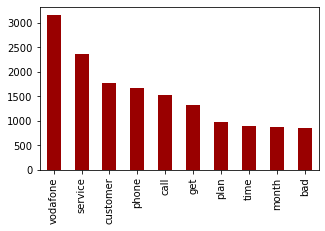

In [50]:
def strip_punct(word):
    word =  re.sub("[,\.;:\(\)\{\}\[\]!?\"\s\n]+", " ", word)
    word =  re.sub("\s+", " ", word)
    return word

def list_of_words(df, column):
    word_frame = pd.DataFrame(columns = ["words"])
    for i in range(len(df)):
        for sentence in df[column].iloc[i]:
            words = sentence[0].split(" ")
            word_frame = word_frame.append(pd.DataFrame(words,columns = ["words"]))
        
    return word_frame




word_frame = list_of_words(preprocessed_vodafone_reviews, "lemmatised_sentences")

word_frame = word_frame[word_frame['words']!=""]

print(str(word_frame.words.nunique()) + " " + "Unique terms were found in the data")

spell = SpellChecker()

unknown_words = spell.unknown(word_frame["words"].to_list())

unknown_word_counts = word_frame[word_frame['words'].isin(unknown_words)].value_counts()

print(str(len(unknown_words)) + " " + "Unknown terms found")

word_frame["words"].value_counts().head(10).plot(kind='bar',figsize=(5,3), color='#990000');

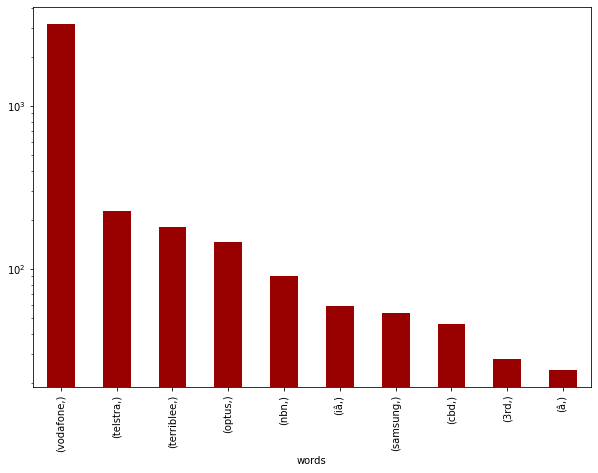

In [53]:
unknown_word_counts.head(10).plot(kind='bar',figsize=(10,7), logy=True, color='#990000' );

In [51]:
print(unknown_words)

{'booragoon', '17gb', 'intâ', 'vfau', 'maylands', 'faaaar', 'commected', 'ccc', 'toowoomba', '21rst', 'longreach', 'whatdafail', 'ps5', '2am', 'tumultuos', 'need5', 'helensvale', 'nonexistant', 'frankston', 'emailied', 'omfg', 'reconform', 'chadstone', 'serviceif', '24gig', 'tomah', 'frm', '1week', 'iem', 'ashfield', '7gig', 'decleration', 'fraudulents', 'pdf', '10min', 'tnx', 'qns', 'promisises', 'centresthe', 'exellent', 'servoice', 'deactive', 'childline', 'nothingexpensive', 'corperation', 'vodaphones', 'mymix', 'pottspoint', 'bendigo', 'fremental', 'sameover', 'rcharge', 'geelong', 'vodafoneau', 'unethial', '6months', '28cents', 'aresolution', 'allhours', 'servicebad', 'mmhmmm', 'uncontactable', 'accc', 'campare', '2020again', 'serviceexpensive', 'bulshit', 'shagufta', 's21', 'lowthis', '24th', 'shockingg', 'upreasonable', 'covid', 'techncial', 'webbrowsing', 'eastland', 'telcos', 'grr', '3rd', 'produyct', 'dodgie', 'convolute', 'vadil', 'burwood', 'wantthe', 'vodafoneprobably', '

In [6]:

import ast

def term_df_with_scores(df, column):
    term_frame = pd.DataFrame(columns = ["term","sentiment","promoter_score"])

    for i in range(len(df)):
        row = df[column].iloc[i]
        #row = list(ast.literal_eval(row))
        row_frame = pd.DataFrame.from_records(row, columns=['term','sentiment','promoter_score'])
        term_frame = term_frame.append(row_frame)
            
    return term_frame

In [7]:
## Create a function to return the correlation between score and sentiment for 
# two terms, ngrams, noun phrases etc

def get_corr(df, column):
    term_frame = term_df_with_scores(df, column)
    term_frame[["sentiment", "promoter_score"]] = term_frame[["sentiment", "promoter_score"]].apply(pd.to_numeric)
    result_frame = pd.DataFrame(columns = ["term","sentiment_correlation","count"])
    unique_terms = term_frame.term.unique()
    
    for term in unique_terms:
        temp_frame = term_frame[term_frame.term==term]
        correlation = temp_frame["sentiment"].corr(temp_frame["promoter_score"])
        count = len(temp_frame)
        if not np.isnan(correlation):
            result_frame = result_frame.append(pd.DataFrame([[term, correlation, count]], columns = ["term","sentiment_correlation","count"]))
    return result_frame
    

In [8]:
nounphrases_correlations = get_corr(preprocessed_vodafone_reviews, "noun_phrases")
bi_gram_correlations = get_corr(preprocessed_vodafone_reviews, "bi_grams")
tri_gram_correlations = get_corr(preprocessed_vodafone_reviews, "tri_grams")
word_correlations = get_corr(preprocessed_vodafone_reviews, "words")
noun_correlations = get_corr(preprocessed_vodafone_reviews, "nouns")

In [9]:
nounphrases_correlations.to_csv ('nounphrases_correlations.csv', index = None, header=True)
bi_gram_correlations.to_csv ('bi_gram_correlations.csv', index = None, header=True)
tri_gram_correlations.to_csv ('tri_gram_correlations.csv', index = None, header=True)
word_correlations.to_csv ('word_correlations.csv', index = None, header=True)
noun_correlations.to_csv ('nouns_correlations.csv', index = None, header=True)

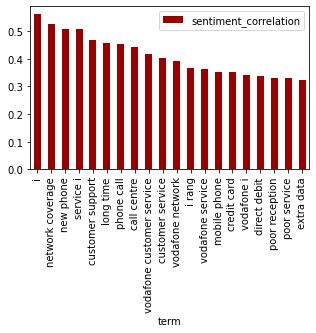

In [10]:
nounphrases_correlations[nounphrases_correlations['count']>20].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


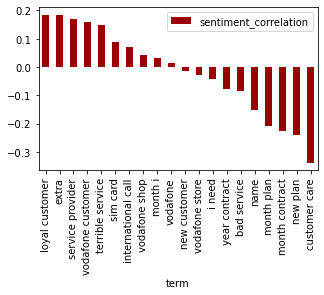

In [11]:
nounphrases_correlations[nounphrases_correlations['count']>20].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


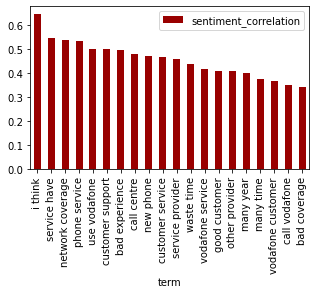

In [12]:
bi_gram_correlations[bi_gram_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


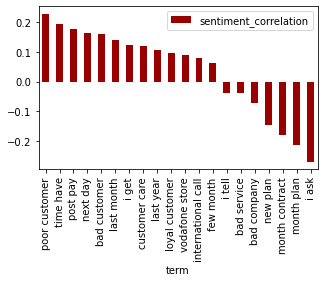

In [13]:
bi_gram_correlations[bi_gram_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


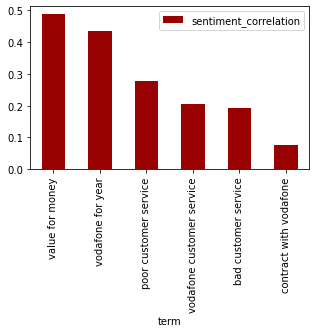

In [14]:
tri_gram_correlations[tri_gram_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


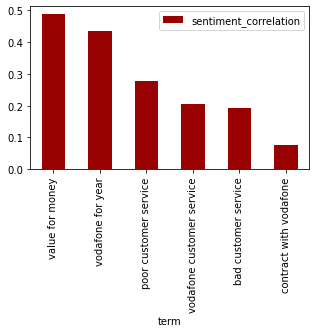

In [15]:
tri_gram_correlations[tri_gram_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


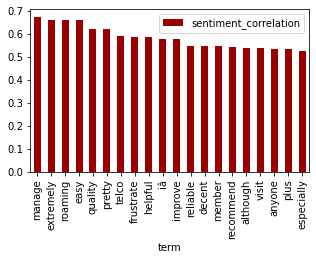

In [16]:
word_correlations[word_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


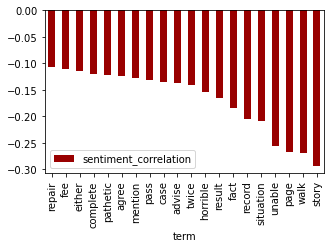

In [17]:
word_correlations[word_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


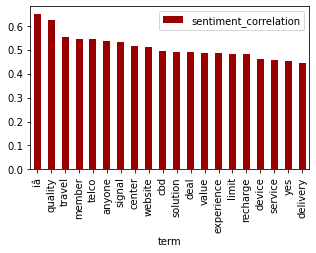

In [18]:
noun_correlations[noun_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).head(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


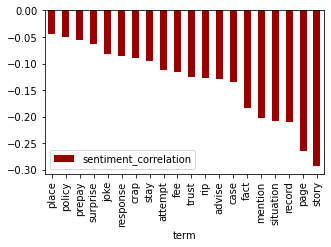

In [19]:
noun_correlations[noun_correlations['count']>30].sort_values(by='sentiment_correlation',ascending=False).tail(20).plot(kind='bar',figsize=(5,3), x='term', y='sentiment_correlation', color='#990000');


In [20]:
# Get number of documents each word appears in

def doc_count(df, column):
    
    # Produce a 2 column df with the document ID and the column to be measured
    temp_df = pd.DataFrame(columns=['review_id', 'term'])
    num_reviews = df.review_id.nunique()
    for i in range(len(df)):
        review_id = df['review_id'].iloc[i]
        for item in df[column].iloc[i]:
            term = item[0]
            temp_df = temp_df.append(pd.DataFrame([[review_id, term]], columns = ["review_id", "term"]))
            
    results = temp_df.groupby(by='term', as_index=False).agg({'review_id': pd.Series.nunique})
    results['percentage'] = results['review_id']/num_reviews * 100
    results = results.sort_values(by='percentage',ascending=False)
    # add a column for rank
    results['rank'] = 0
    r = 1
    for i in range(len(results)):
        results['rank'].iloc[i] = r
        r += 1
    
    results = results.rename(columns={"review_id": "reviews_containing_term"})
    return results
    
    
doc_count(preprocessed_vodafone_reviews, 'noun_phrases')

,term,reviews_containing_term,percentage,rank
1659,customer service,369,19.390436,1
7086,time i,72,3.783500,2
4617,new phone,68,3.573305,3
4490,network coverage,48,2.522333,4
5480,poor customer service,44,2.312139,5
...,...,...,...,...
2939,great network coverage,1,0.052549,8136
2938,great monthly deal,1,0.052549,8137
2937,great mobile plan internet plan,1,0.052549,8138
2936,great mobile phone service provider,1,0.052549,8139


In [21]:
def get_unique_terms(df, column):
    
    temp_df = pd.DataFrame(columns=['term'])
    for i in range(len(df)):
        for item in df[column].iloc[i]:
            term = item[0]
            temp_df = temp_df.append(pd.DataFrame([[term]], columns = ["term"]))
            
    return pd.DataFrame(temp_df.term.unique(), columns=['term'])

def track_rank_changes(df, column):
    #results = pd.DataFrame(columns=['term', 'perc_detractor', 'perc_passive', 'perc_promoter', 'total_change'])
    all_unique_terms = get_unique_terms(df, column)
    #print(all_unique_terms)
    all_unique_terms['perc_detractor'] = 0
    all_unique_terms['perc_passive'] = 0
    all_unique_terms['perc_promoter'] = 0
    all_unique_terms['total_change'] = 0    
    
    
    detractors = doc_count(df[df['score'] <=3], column)
    passive = doc_count(df[df['score'] ==4], column)
    promotors = doc_count(df[df['score'] ==5], column)
    
    for i in range(len(all_unique_terms)):
        if all_unique_terms['term'].iloc[i] in detractors['term'].tolist():
            perc_detractor = detractors[detractors['term'] == all_unique_terms['term'].iloc[i]].percentage.iloc[0]
        else:
            perc_detractor = 0
            
        if all_unique_terms['term'].iloc[i] in passive['term'].tolist():
            perc_passive = passive[passive['term'] == all_unique_terms['term'].iloc[i]].percentage.iloc[0]
        else:
            perc_passive = 0
        
        if all_unique_terms['term'].iloc[i] in promotors['term'].tolist():
            perc_promoter = promotors[promotors['term'] == all_unique_terms['term'].iloc[i]].percentage.iloc[0]
        else:
            perc_promoter = 0
            
        total_change = perc_promoter - perc_detractor
        
        all_unique_terms['perc_detractor'].iloc[i] = perc_detractor
        all_unique_terms['perc_passive'].iloc[i] = perc_passive
        all_unique_terms['perc_promoter'].iloc[i] = perc_promoter
        all_unique_terms['total_change'].iloc[i] = total_change        

    return all_unique_terms.sort_values(by='total_change',ascending=False)
    

In [22]:
track_noun_phrases = track_rank_changes(preprocessed_vodafone_reviews, 'noun_phrases') 
print("Noun Phrases Done")
track_nouns =  track_rank_changes(preprocessed_vodafone_reviews, 'nouns')
print("Nouns Done")
track_words = track_rank_changes(preprocessed_vodafone_reviews, 'words') 
print("Words Done")
track_bigrams = track_rank_changes(preprocessed_vodafone_reviews, 'bi_grams') 
print("Bigrams done")
track_trigrams = track_rank_changes(preprocessed_vodafone_reviews, 'tri_grams') 
print("Trigrams done")

Noun Phrases Done
Nouns Done
Words Done
Bigrams done
Trigrams done


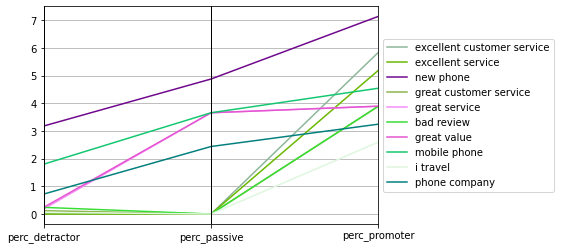

In [39]:
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

plt.figure();


parallel_coordinates(track_noun_phrases[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


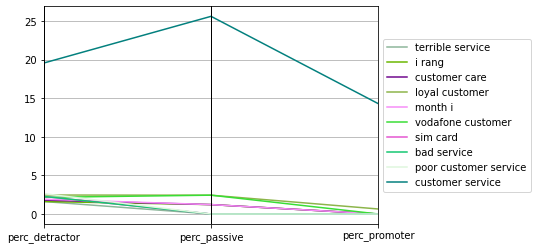

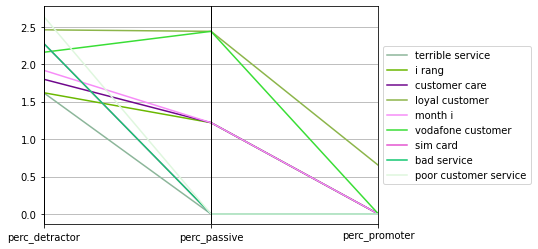

In [48]:
parallel_coordinates(track_noun_phrases[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
plt.figure();
parallel_coordinates(track_noun_phrases[['term','perc_detractor','perc_passive','perc_promoter']].tail(10).head(9), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


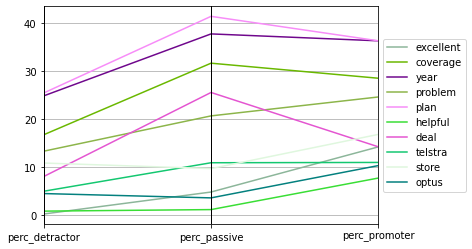

In [25]:
parallel_coordinates(track_nouns[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


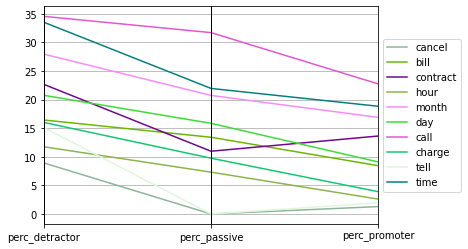

In [33]:
parallel_coordinates(track_nouns[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


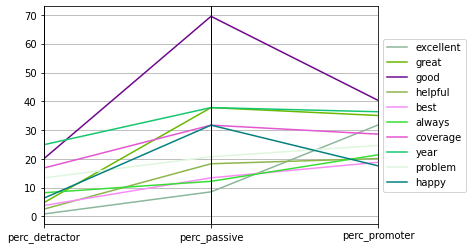

In [27]:
parallel_coordinates(track_words[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


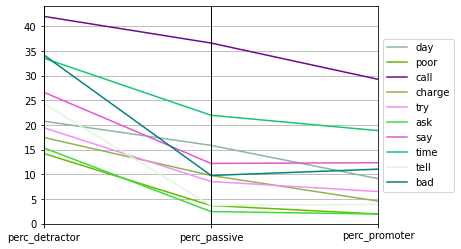

In [28]:
parallel_coordinates(track_words[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


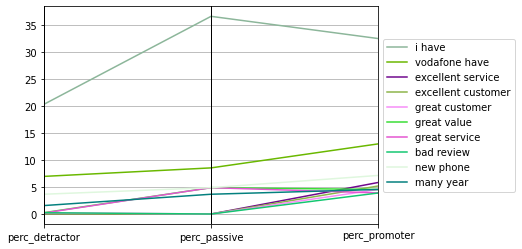

In [29]:
parallel_coordinates(track_bigrams[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


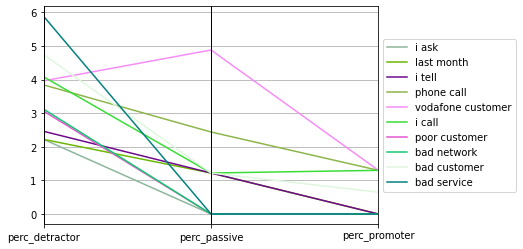

In [30]:
parallel_coordinates(track_bigrams[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


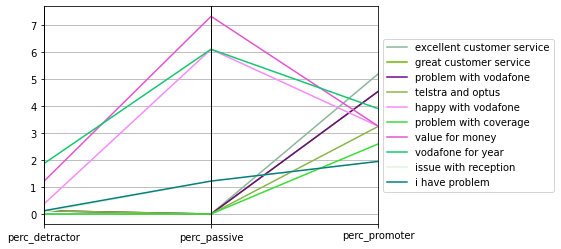

In [31]:
parallel_coordinates(track_trigrams[['term','perc_detractor','perc_passive','perc_promoter']].head(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));


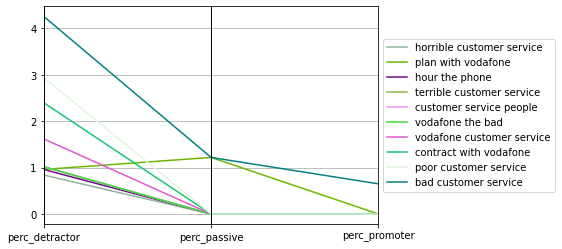

In [32]:
parallel_coordinates(track_trigrams[['term','perc_detractor','perc_passive','perc_promoter']].tail(10), "term").legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
